<br>

####   EPL Top 5 Prediction
+ clasification or regression of via decision trees and random forests of your own dataset...


In [147]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [148]:
filename = 'EPL-Standings-2010-2021.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

EPL-Standings-2010-2021.csv : file read into a pandas dataframe.


In [149]:
df_tidy

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2010-11,1,Manchester United,38,23,11,4,78,37,41,80,Qualification for the Champions League group s...
1,2010-11,2,Chelsea,38,21,8,9,69,33,36,71,Qualification for the Champions League group s...
2,2010-11,3,Manchester City,38,21,8,9,60,33,27,71,Qualification for the Champions League group s...
3,2010-11,4,Arsenal,38,19,11,8,72,43,29,68,Qualification for the Champions League play-of...
4,2010-11,5,Tottenham Hotspur,38,16,14,8,55,46,9,62,Qualification for the Europa League play-off r...
...,...,...,...,...,...,...,...,...,...,...,...,...
215,2020-21,16,Brighton & Hove Albion,38,9,14,15,40,46,-6,41,Not Applicable
216,2020-21,17,Burnley,38,10,9,19,33,55,-22,39,Not Applicable
217,2020-21,18,Fulham,38,5,13,20,27,53,-26,28,Relegation to the EFL Championship
218,2020-21,19,West Bromwich Albion,38,5,11,22,35,76,-41,26,Relegation to the EFL Championship


In [150]:
def convert_league(position):
    """
    """
    if position < 6:
        return 2
    elif position > 17:
        return 0
    else:
        return 1


In [151]:
df_model2 = df_tidy.copy()

df_model2["Status"] = df_model2["Pos"].apply(convert_league)
df_model2

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,Status
0,2010-11,1,Manchester United,38,23,11,4,78,37,41,80,Qualification for the Champions League group s...,2
1,2010-11,2,Chelsea,38,21,8,9,69,33,36,71,Qualification for the Champions League group s...,2
2,2010-11,3,Manchester City,38,21,8,9,60,33,27,71,Qualification for the Champions League group s...,2
3,2010-11,4,Arsenal,38,19,11,8,72,43,29,68,Qualification for the Champions League play-of...,2
4,2010-11,5,Tottenham Hotspur,38,16,14,8,55,46,9,62,Qualification for the Europa League play-off r...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2020-21,16,Brighton & Hove Albion,38,9,14,15,40,46,-6,41,Not Applicable,1
216,2020-21,17,Burnley,38,10,9,19,33,55,-22,39,Not Applicable,1
217,2020-21,18,Fulham,38,5,13,20,27,53,-26,28,Relegation to the EFL Championship,0
218,2020-21,19,West Bromwich Albion,38,5,11,22,35,76,-41,26,Relegation to the EFL Championship,0


In [152]:
ROW = 0
COLUMN = 1
df_model1 = df_model2.drop([ "Pos", "Qualification or relegation", "Pts", "GD", "Season", "Team", "Pld"], axis=COLUMN )
df_model1

,W,D,L,GF,GA,Status
0,23,11,4,78,37,2
1,21,8,9,69,33,2
2,21,8,9,60,33,2
3,19,11,8,72,43,2
4,16,14,8,55,46,2
...,...,...,...,...,...,...
215,9,14,15,40,46,1
216,10,9,19,33,55,1
217,5,13,20,27,53,0
218,5,11,22,35,76,0


In [153]:
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


SPECIES = ["Relegation",  "Middle", "Top5"]   # int to str
SPECIES_INDEX = {"Relegation":0, "Middle":1, "Top5":2}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['W', 'D', 'L', 'GF', 'GA', 'Status'], dtype='object')

COLUMNS[0] is W

COL_INDEX is {'W': 0, 'D': 1, 'L': 2, 'GF': 3, 'GA': 4, 'Status': 5}


Relegation maps to 0
Middle maps to 1
Top5 maps to 2


In [154]:
A = df_model1.to_numpy()   
A = A.astype('float64') 

In [155]:
# choose a row index, n:
n = 42
print(f"Team #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

species_index = COL_INDEX['Status']
species_num = int(round(A[n][species_index]))
species = SPECIES[species_num]
print(f"  Its species is {species} (i.e., {species_num})")

Team #42 is [22.  9.  7. 75. 39.  2.]
  Its W is 22.0
  Its D is 9.0
  Its L is 7.0
  Its GF is 75.0
  Its GA is 39.0
  Its Status is 2.0
  Its species is Top5 (i.e., 2)


In [156]:
print("+++ Start of data definitions +++\n")

X_all = A[:,0:5]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,5]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0.]
X_all (just the features, first few rows) are 
 [[23. 11.  4. 78. 37.]
 [21.  8.  9. 69. 33.]
 [21.  8.  9. 60. 33.]
 [19. 11.  8. 72. 43.]
 [16. 14.  8. 55. 46.]]


In [157]:
#
# scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [1. 1. 1. 0. 2. 2. 0. 1. 0. 1. 0. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 0. 2. 1.
 1. 0. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1.
 2. 0. 0. 2. 0. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 2. 1. 2. 2. 1. 0. 2. 1. 1. 2. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 2. 0. 1. 2. 0. 1. 1. 0. 1. 2. 0. 1. 1. 0. 1. 2. 2. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1.
 1. 2. 1. 2. 0. 2. 1. 1. 2. 1. 2. 0. 1. 1. 2. 1. 0. 1. 1. 2. 1. 1. 1. 0.
 2. 1. 0. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 0. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1.
 1. 2. 0. 1.]
The corresponding data rows are 
 [[11.  8. 19. 46. 55.]
 [19.  7. 12. 64. 43.]
 [ 7. 17. 14. 31. 53.]
 [ 9. 10. 19. 44. 65.]
 [32.  2.  4. 95. 23.]]


In [158]:
#
# Next separate into test data and training data ... 
##
# Following common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 176 rows;  testing with 44 rows

Held-out data... (testing data: 44)
y_test: [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 2. 1. 1. 2. 1.]

X_test (few rows): [[11. 11. 16. 41. 56.]
 [12. 11. 15. 56. 60.]
 [11.  8. 19. 46. 55.]
 [32.  3.  3. 85. 33.]
 [ 9. 15. 14. 40. 61.]]

Data used for modeling... (training data: 176)
y_train: [0. 0. 1. 2. 2. 2. 1. 0. 2. 1. 0. 1. 0. 1. 1. 2. 1. 1. 0. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 0. 1. 2. 1. 0. 0. 1. 1. 1. 1. 2.
 2. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 2. 2. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 2.
 2. 1. 0. 0. 1. 0. 1. 1. 2. 2. 1. 2. 1. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 0. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 0. 1. 2. 1. 2. 1. 1. 1. 1. 2.
 1. 2. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 2. 0. 2. 1. 1. 1. 1. 0. 0. 1. 2. 1. 1. 1. 1. 2. 0. 1. 1. 2. 1. 2. 0.
 2. 1. 1. 1. 1. 1. 0. 2.]

X_train (few rows): [[  7.   9.  22.  32.  

In [159]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
#
from sklearn import tree      # for decision trees

best_depth = 1   #  don't know what depth to use, so guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [160]:
#
# +++ This cell will "Model-testing Cell"
#
#
predicted_labels = dtree_model.predict(X_test)   
actual_labels = y_test

# Print to compare
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1.]
Actual  labels  : [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 2. 1. 1. 2. 1.]

Results on test set:  38 correct out of 44 total.


In [161]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :       Middle Middle         
row   1 :       Middle Middle         
row   2 :       Middle Middle         
row   3 :         Top5 Top5           
row   4 :       Middle Middle         
row   5 :       Middle Middle         
row   6 :       Middle Middle         
row   7 :       Middle Middle         
row   8 :       Middle Middle         
row   9 :         Top5 Top5           
row  10 :         Top5 Top5           
row  11 :       Middle Middle         
row  12 :       Middle Middle         
row  13 :       Middle Middle         
row  14 :       Middle Middle         
row  15 :       Middle Relegation     incorrect
row  16 :       Middle Middle         
row  17 :       Middle Relegation     incorrect
row  18 :       Middle Relegation     incorrect
row  19 :         Top5 Middle         incorrect
row  20 :       Middle Middle         
row  21 :       Middle Middle         
row  22 :       Middle Middle         
row  23 :       Middle Middle         
row  24 :       Middle Middl

38

In [162]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)
    
#
# Lab task:  build trees at depths 1 and 2+ (submit in this notebook -- see next cell for depth-1 solution)
#

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="W <= 18.5\ngini = 0.574\nsamples = 176\nvalue = [28, 101, 47]\nclass = Middle", fillcolor="#acf4ca"] ;
1 [label="gini = 0.377\nsamples = 128\nvalue = [28, 97, 3]\nclass = Middle", fillcolor="#76eda8"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.153\nsamples = 48\nvalue = [0, 4, 44]\nclass = Top5", fillcolor="#8c4be7"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


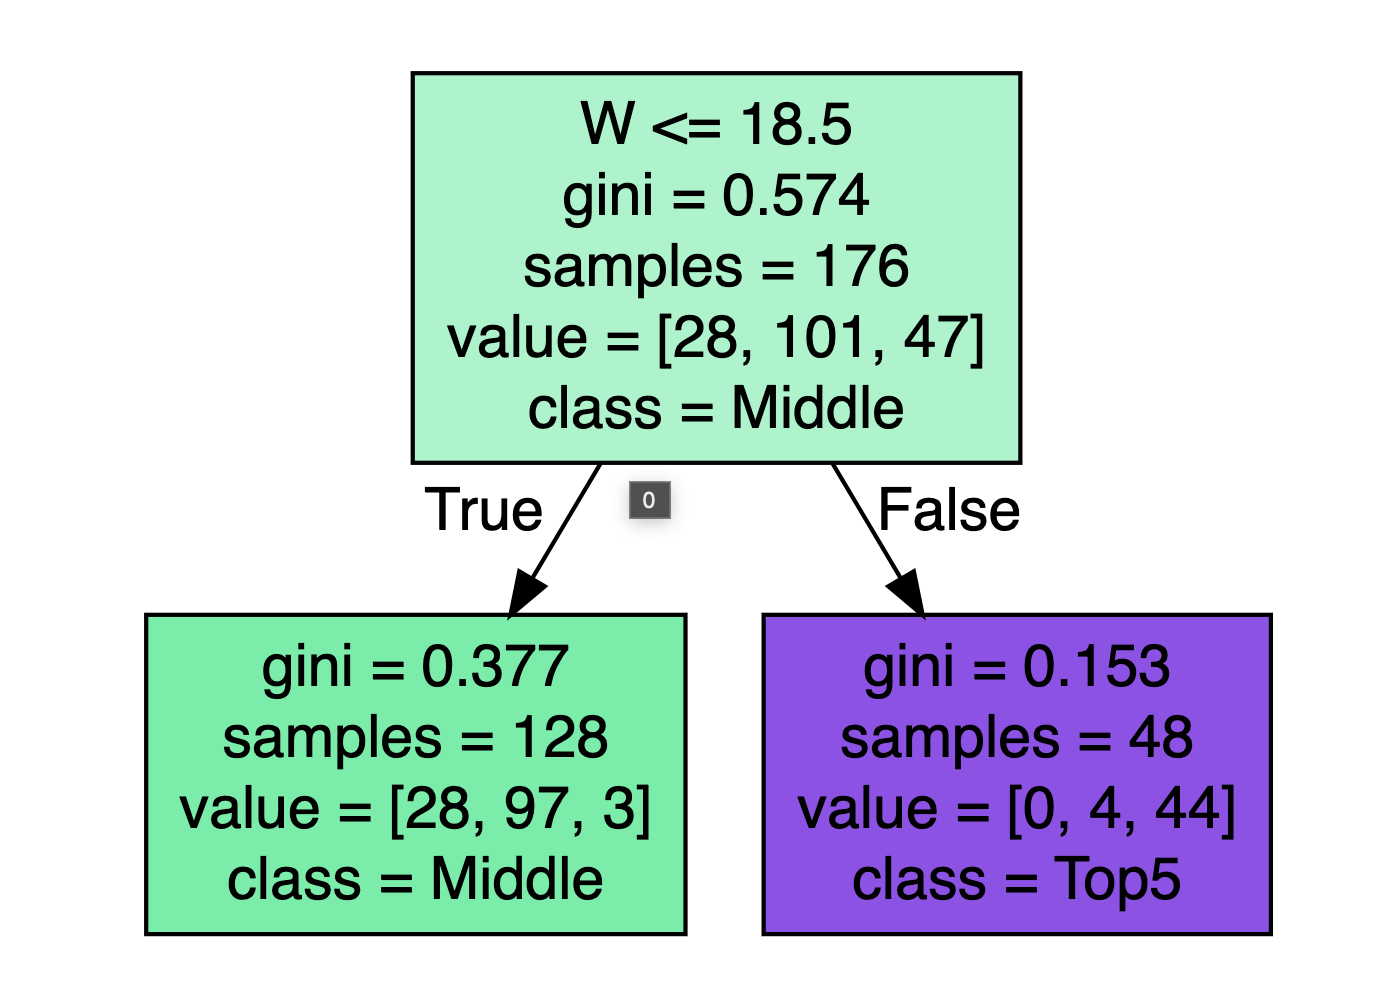

In [183]:
#
# add locally, to this notebook...
#

from IPython import display
display.Image("./soccer_ss3.png")  # be sure it's in the right place!

In [164]:
#
# To compare different tree-depths, use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. Use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,6):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d

    
    
# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} is our choice for an underfitting/overfitting balance.")  

depth:  1  cv accuracy:  0.8013
depth:  2  cv accuracy:  0.8186
depth:  3  cv accuracy:  0.9095
depth:  4  cv accuracy:  0.8641
depth:  5  cv accuracy:  0.8810

best_depth = 3 is our choice for an underfitting/overfitting balance.


In [165]:
#
# Now, re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 3


In [166]:
#
# Now, let's see the tree!
#

predicted_labels = dtree_model_tuned.predict(X_test)   
actual_labels = y_test
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)
#
# your task: copy, alter, and re-run the above cells so that you create and 
#            include an image of this deeper tree here in this file
#


Results on test set:  42 correct out of 44 total.
file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="W <= 18.5\ngini = 0.574\nsamples = 176\nvalue = [28, 101, 47]\nclass = Middle", fillcolor="#acf4ca"] ;
1 [label="W <= 8.5\ngini = 0.377\nsamples = 128\nvalue = [28, 97, 3]\nclass = Middle", fillcolor="#76eda8"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="L <= 17.5\ngini = 0.219\nsamples = 24\nvalue = [21, 3, 0]\nclass = Relegation", fillcolor="#e99355"] ;
1 -> 2 ;
3 [label="gini = 0.375\nsamples = 4\nvalue = [1, 3, 0]\nclass = Middle", fillcolor="#7beeab"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 20\nvalue = [20, 0, 0]\nclass = Relegation", fillcolor="#e58139"] ;
2 -> 4 ;
5 [label="L <= 21.5\ngini = 0.178\nsamples = 104\nvalue = [7, 94, 3]\nclass = Middle", fill

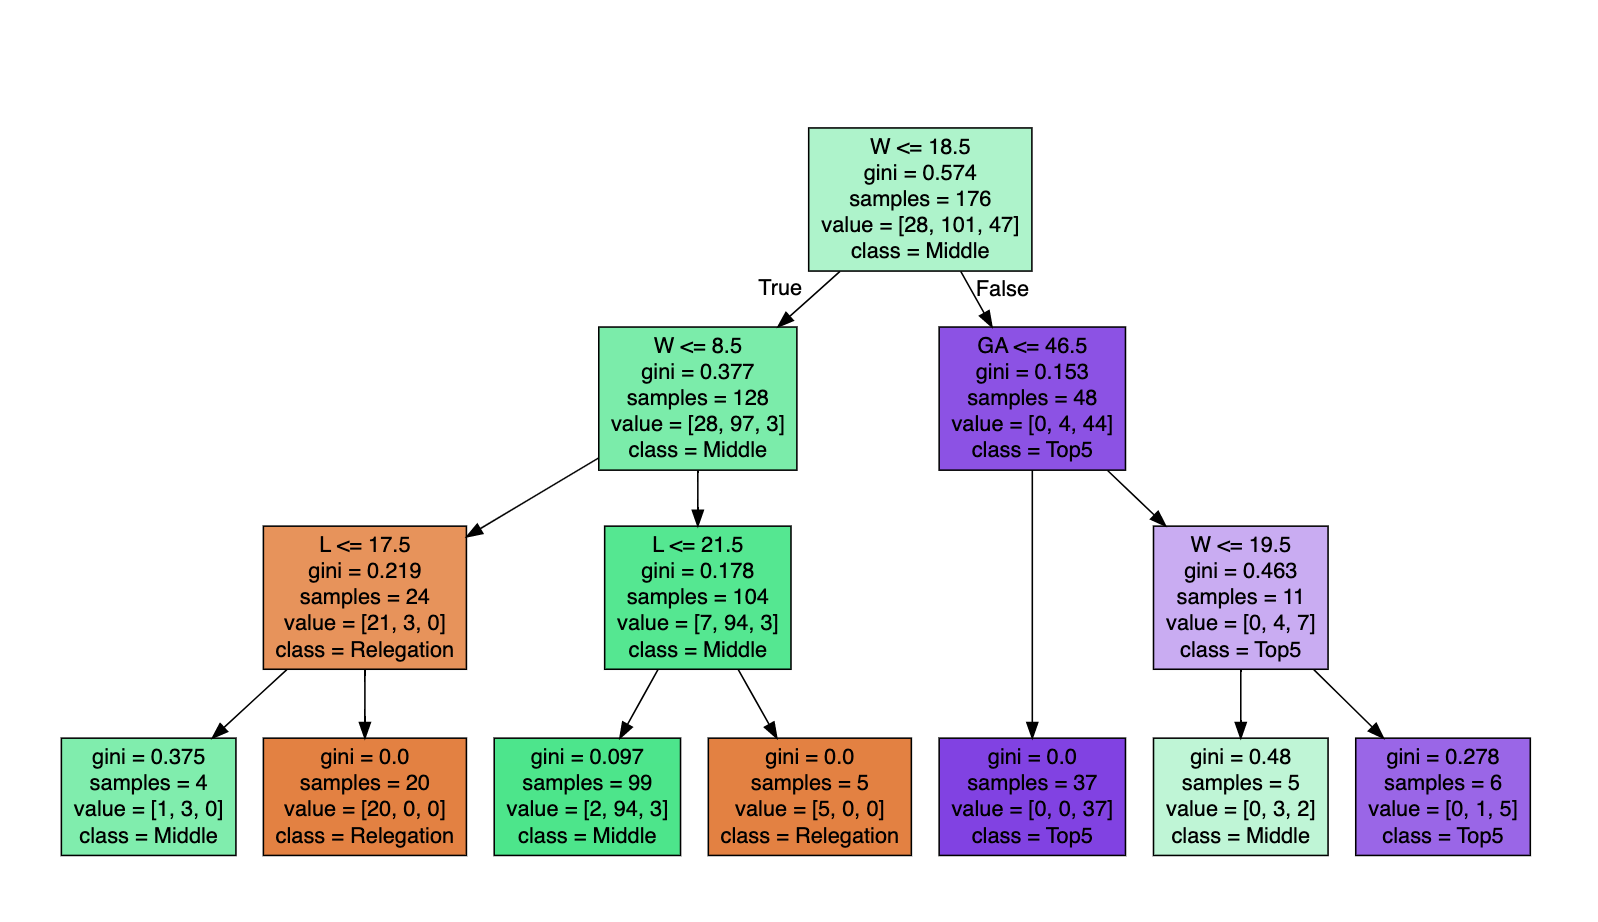

In [182]:
from IPython import display
display.Image("./soccer_ss2.png")

In [168]:
##
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# print & compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# print nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 1. 1. 0. 2. 1. 1. 1. 1.
 1. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 2. 1. 1. 2. 1.]
Actual labels: [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 2. 1. 1. 2. 1.]

row   0 :       Middle Middle         
row   1 :       Middle Middle         
row   2 :       Middle Middle         
row   3 :         Top5 Top5           
row   4 :       Middle Middle         
row   5 :       Middle Middle         
row   6 :       Middle Middle         
row   7 :       Middle Middle         
row   8 :       Middle Middle         
row   9 :         Top5 Top5           
row  10 :         Top5 Top5           
row  11 :       Middle Middle         
row  12 :       Middle Middle         
row  13 :       Middle Middle         
row  14 :       Middle Middle         
row  15 :   Relegation Relegation     
row  16 :       Middle Middle         
row  17 :       Middle Relegation

42

In [169]:
from sklearn import tree      # for decision trees

# should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 3


In [170]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    return f"{name} ({predicted_species})"
    

In [171]:
#
# feature importances!
# 
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked 
# 
# feature importances are often even more "important" than predictions, 
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.7948939  0.         0.17691191 0.         0.02819419]

Feature            W has   79.49% of the decision-making importance.
Feature            D has    0.00% of the decision-making importance.
Feature            L has   17.69% of the decision-making importance.
Feature           GF has    0.00% of the decision-making importance.
Feature           GA has    2.82% of the decision-making importance.


In [172]:
#
# "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # don't know what depth to use, so guess...
best_num_trees = 42   # again, guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests,  will let max_samples be 0.5  explore best_d and best_num_trees...

#  train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")  

Built an RF with depth=1 and number of trees=42


In [173]:
#
# "Model-testing Cell"
#
#

# Run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1.]
Actual  labels  : [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 2. 1. 1. 2. 1.]

Results on test set:  38 correct out of 44 total.
row   0 :       Middle Middle         
row   1 :       Middle Middle         
row   2 :       Middle Middle         
row   3 :         Top5 Top5           
row   4 :       Middle Middle         
row   5 :       Middle Middle         
row   6 :       Middle Middle         
row   7 :       Middle Middle         
row   8 :       Middle Middle         
row   9 :         Top5 Top5           
row  10 :         Top5 Top5           
row  11 :       Middle Middle         
row  12 :       Middle Middle         
row  13 :       Middle Middle         
row  14 :       Middle Middle         
row  15 :       Middle Relegation     incorrect
row  16 : 

38

In [174]:
#
# Get the individual trees
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but won't do so here. 
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!
                            
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='auto',
                       random_state=1423247275)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="W <= 17.5\ngini = 0.575\nsamples = 66\nvalue = [13, 50, 25]\nclass = Middle", fillcolor="#b0f5cd"] ;
1 [label="gini = 0.356\nsamples = 48\nvalue = [13, 48, 1]\nclass = Middle", fillcolor="#72eca5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.142\nsamples = 18\nvalue = [0, 2, 24]\nclass = Top5", fillcolor="#8c49e7"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


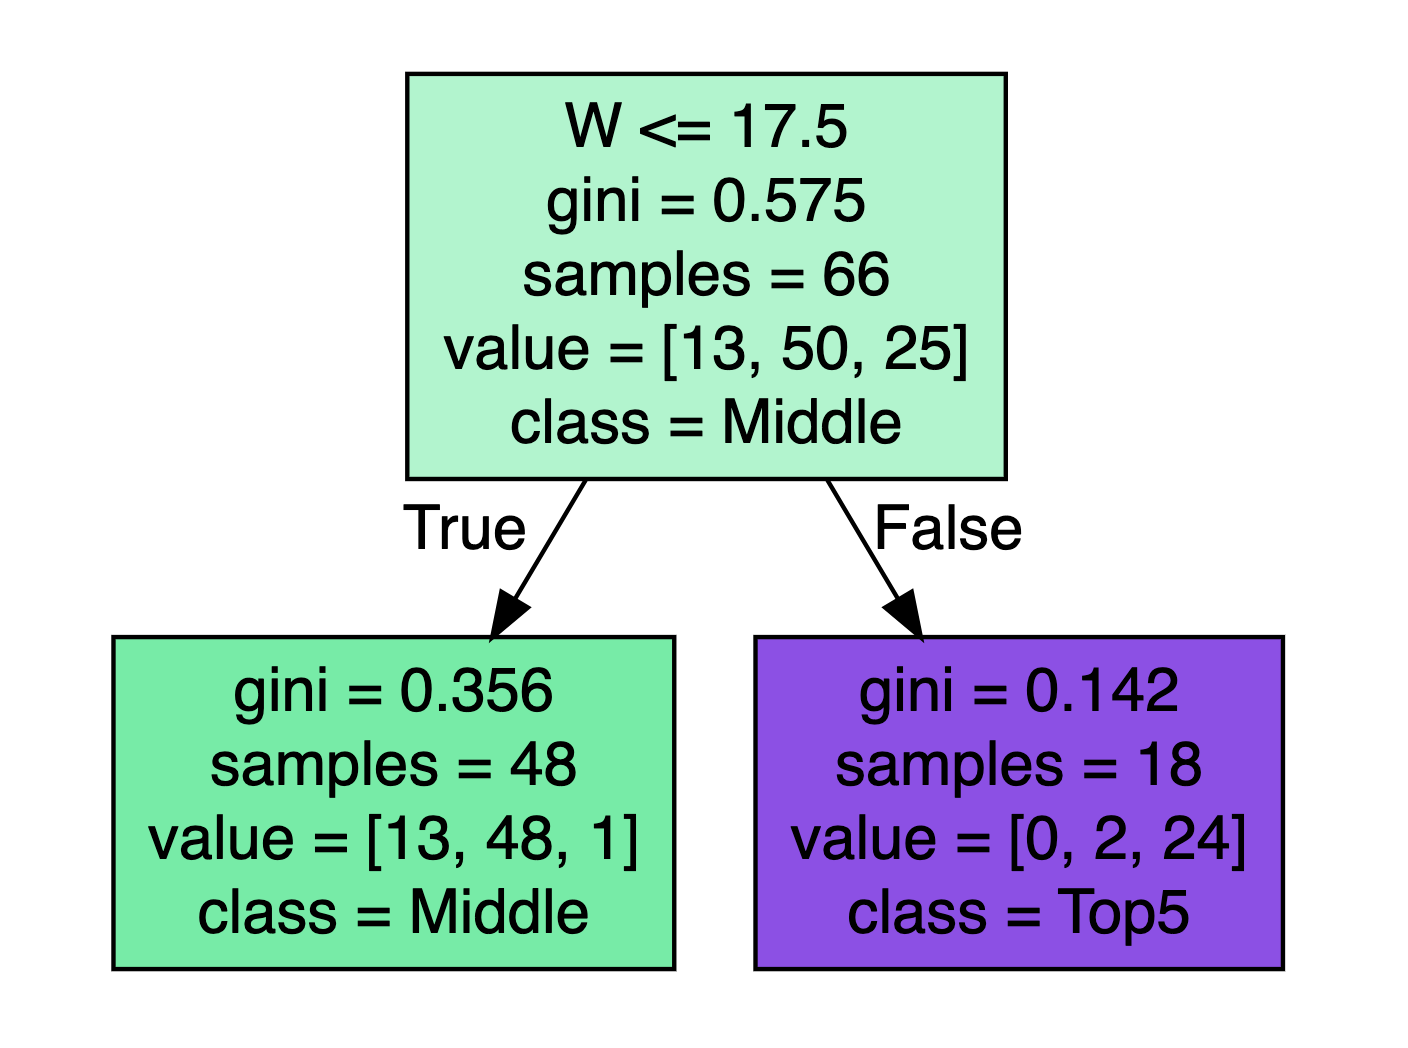

In [181]:
#
# add locally, to this notebook...
#

from IPython import display
display.Image("./soccer_ss1.png")  # be sure it's in the right place!

In [176]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#


best_d = d
best_ntrees = 50   # range(50,300,100)
best_score = 0

for d in range(1,6):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

# 
# your task: assign best values by keeping a "running max"
#
best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.7956
depth:  1 ntrees: 150 cv accuracy:  0.8013
depth:  1 ntrees: 250 cv accuracy:  0.7956
depth:  2 ntrees:  50 cv accuracy:  0.8978
depth:  2 ntrees: 150 cv accuracy:  0.8976
depth:  2 ntrees: 250 cv accuracy:  0.8921
depth:  3 ntrees:  50 cv accuracy:  0.9040
depth:  3 ntrees: 150 cv accuracy:  0.8979
depth:  3 ntrees: 250 cv accuracy:  0.8979
depth:  4 ntrees:  50 cv accuracy:  0.9035
depth:  4 ntrees: 150 cv accuracy:  0.9094
depth:  4 ntrees: 250 cv accuracy:  0.8925
depth:  5 ntrees:  50 cv accuracy:  0.8981
depth:  5 ntrees: 150 cv accuracy:  0.9095
depth:  5 ntrees: 250 cv accuracy:  0.9098

best_depth: 5 and best_num_trees: 50 are our choices.


In [177]:
#
# Now, re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth = 5
best_num_trees = 50
# should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [178]:
#
# +++ This is our "Model-testing Cell"
#
#

# run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 1. 1. 0. 2. 1. 1. 1. 1.
 1. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 2. 1. 1. 2. 1.]
Actual  labels  : [1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 2. 1. 1. 2. 1.]

Results on test set:  42 correct out of 44 total.
row   0 :       Middle Middle         
row   1 :       Middle Middle         
row   2 :       Middle Middle         
row   3 :         Top5 Top5           
row   4 :       Middle Middle         
row   5 :       Middle Middle         
row   6 :       Middle Middle         
row   7 :       Middle Middle         
row   8 :       Middle Middle         
row   9 :         Top5 Top5           
row  10 :         Top5 Top5           
row  11 :       Middle Middle         
row  12 :       Middle Middle         
row  13 :       Middle Middle         
row  14 :       Middle Middle         
row  15 :   Relegation Relegation     
row  16 :       Mid

42

In [179]:
#
# Tuned our RF to use the "best" parameters
#
# Use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# Should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# Train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [180]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.45436179 0.04255992 0.20244479 0.15120936 0.14942415]

Feature            W has   45.44% of the decision-making importance.
Feature            D has    4.26% of the decision-making importance.
Feature            L has   20.24% of the decision-making importance.
Feature           GF has   15.12% of the decision-making importance.
Feature           GA has   14.94% of the decision-making importance.


<br>

#### Visualizing some facet of the data
+ be sure to include _some_ visualization of the dataset, either here or in the modeler
+ and compute the feature_importances (it's not necessary to visualize those: they may or may not add insight)